In [1]:
!nvidia-smi

Sun May 28 13:30:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
"""
try:
  import cuml
except (ImportError, KeyError, ModuleNotFoundError):
  !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
  !python rapidsai-csp-utils/colab/pip-install.py
"""


'\ntry:\n  import cuml\nexcept (ImportError, KeyError, ModuleNotFoundError):\n  !git clone https://github.com/rapidsai/rapidsai-csp-utils.git\n  !python rapidsai-csp-utils/colab/pip-install.py\n'

In [3]:
# check if cuda is installed correctly
#!nvcc --version

In [4]:
# Mount google drive to colab and change to correct directory
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/Othercomputers/ThinkPad/master-thesis-vt23

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Othercomputers/ThinkPad/master-thesis-vt23


In [5]:
# Quickfix for dependencies in colab
# Try to import packages, if exception is thrown install dependencies and kill runtime
%cd /content/drive/Othercomputers/ThinkPad/master-thesis-vt23
try:
  from pycaret.classification import *
except (ImportError, KeyError, ModuleNotFoundError):
  ## code to install dependencies
  !pip install -r colab_requirements.txt
  #!pip install kmodes
  #!pip install pomegranate==0.14.8  #needed for sdmetrics BNLikelihood metric
  display('Stopping RUNTIME! Colaboratory will restart automatically. Please run again.')
  import os
  os.kill(os.getpid(), 9)

/content/drive/Othercomputers/ThinkPad/master-thesis-vt23


In [6]:
%cd /content/drive/Othercomputers/ThinkPad/master-thesis-vt23/notebooks
%run -t Step2-Model-CPU.ipynb

/content/drive/Othercomputers/ThinkPad/master-thesis-vt23/notebooks


,Description,Value
0,Session id,8651
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 9)"
4,Transformed data shape,"(891, 11)"
5,Transformed train set shape,"(712, 11)"
6,Transformed test set shape,"(179, 11)"
7,Ordinal features,2
8,Numeric features,4
9,Categorical features,2


Tune grid: {'C': [0.0001, 0.00026366508987303583, 0.0006951927961775605, 0.0018329807108324356, 0.004832930238571752, 0.012742749857031334, 0.03359818286283781, 0.08858667904100823, 0.23357214690901212, 0.615848211066026, 1.623776739188721, 4.281332398719396, 11.288378916846883, 29.763514416313132, 78.47599703514607, 206.913808111479, 545.5594781168514, 1438.44988828766, 3792.690190732246, 10000.0], 'penalty': ['l2', None]}


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8611,0.8961,0.7143,0.9091,0.8000,0.6959,0.7078
1,0.7778,0.7841,0.6429,0.7500,0.6923,0.5200,0.5238
2,0.7887,0.8392,0.5926,0.8000,0.6809,0.5281,0.5414
3,0.7465,0.7492,0.3704,0.9091,0.5263,0.3926,0.4664
4,0.8592,0.9310,0.7778,0.8400,0.8077,0.6968,0.6981
5,0.7746,0.7946,0.5926,0.7619,0.6667,0.5004,0.5095
6,0.8592,0.8779,0.7037,0.9048,0.7917,0.6878,0.7002
7,0.8028,0.8577,0.7407,0.7407,0.7407,0.5816,0.5816
8,0.7887,0.8620,0.6296,0.7727,0.6939,0.5351,0.5417


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-05-28 13:31:09,773] Searching the best hyperparameters using 712 samples...
[I 2023-05-28 13:31:30,144] Finished hyperparemeter search!


              precision    recall  f1-score     support
0.0            0.832000  0.945455  0.885106  110.000000
1.0            0.888889  0.695652  0.780488   69.000000
accuracy       0.849162  0.849162  0.849162    0.849162
macro avg      0.860444  0.820553  0.832797  179.000000
weighted avg   0.853929  0.849162  0.844779  179.000000
Tune grid: {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski'], 'p': [1, 2]}


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8194,0.8929,0.6786,0.8261,0.7451,0.6074,0.6144
1,0.7361,0.8182,0.5714,0.6957,0.6275,0.4262,0.4311
2,0.8732,0.8249,0.7037,0.9500,0.8085,0.7169,0.7349
3,0.7042,0.7668,0.3333,0.7500,0.4615,0.2970,0.3435
4,0.8592,0.9343,0.7778,0.8400,0.8077,0.6968,0.6981
5,0.7887,0.8544,0.6296,0.7727,0.6939,0.5351,0.5417
6,0.8169,0.8670,0.6296,0.8500,0.7234,0.5911,0.6059
7,0.8310,0.8923,0.7407,0.8000,0.7692,0.6362,0.6374
8,0.7887,0.8561,0.6667,0.7500,0.7059,0.5419,0.5442


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-05-28 13:31:37,484] Searching the best hyperparameters using 712 samples...
[I 2023-05-28 13:31:56,288] Finished hyperparemeter search!


              precision    recall  f1-score     support
0.0            0.811024  0.936364  0.869198  110.000000
1.0            0.865385  0.652174  0.743802   69.000000
accuracy       0.826816  0.826816  0.826816    0.826816
macro avg      0.838204  0.794269  0.806500  179.000000
weighted avg   0.831978  0.826816  0.820861  179.000000
Tune grid: {'C': [0.0001, 0.00026366508987303583, 0.0006951927961775605, 0.0018329807108324356, 0.004832930238571752, 0.012742749857031334, 0.03359818286283781, 0.08858667904100823, 0.23357214690901212, 0.615848211066026, 1.623776739188721, 4.281332398719396, 11.288378916846883, 29.763514416313132, 78.47599703514607, 206.913808111479, 545.5594781168514, 1438.44988828766, 3792.690190732246, 10000.0], 'kernel': ['poly', 'sigmoid', 'rbf'], 'degree': [2, 3, 4, 5, 6], 'gamma': ['scale', 'auto'], 'coef0': [0.0, 0.1, 0.25, 0.5, 0, 75, 1.0], 'shrinking': [True, False], 'max_iter': [100000, 100000]}


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8194,0.0000,0.6071,0.8947,0.7234,0.5966,0.6213
1,0.7639,0.0000,0.5357,0.7895,0.6383,0.4724,0.4920
2,0.7887,0.0000,0.5185,0.8750,0.6512,0.5135,0.5497
3,0.7324,0.0000,0.3333,0.9000,0.4865,0.3536,0.4335
4,0.8873,0.0000,0.7407,0.9524,0.8333,0.7502,0.7637
5,0.8169,0.0000,0.5926,0.8889,0.7111,0.5848,0.6106
6,0.8028,0.0000,0.5556,0.8824,0.6818,0.5494,0.5803
7,0.8732,0.0000,0.7407,0.9091,0.8163,0.7211,0.7299
8,0.8028,0.0000,0.6296,0.8095,0.7083,0.5629,0.5730


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-05-28 13:32:02,941] Searching the best hyperparameters using 712 samples...
[I 2023-05-28 13:32:22,494] Finished hyperparemeter search!


              precision    recall  f1-score     support
0.0            0.810606  0.972727  0.884298  110.000000
1.0            0.936170  0.637681  0.758621   69.000000
accuracy       0.843575  0.843575  0.843575    0.843575
macro avg      0.873388  0.805204  0.821459  179.000000
weighted avg   0.859008  0.843575  0.835852  179.000000
Tune grid: {'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8194,0.8644,0.6071,0.8947,0.7234,0.5966,0.6213
1,0.7500,0.7634,0.3929,0.9167,0.5500,0.4130,0.4842
2,0.7183,0.7997,0.2593,1.0000,0.4118,0.3026,0.4222
3,0.7465,0.7538,0.3333,1.0000,0.5000,0.3826,0.4864
4,0.8310,0.9213,0.5926,0.9412,0.7273,0.6138,0.6483
5,0.6479,0.7504,0.3704,0.5556,0.4444,0.2015,0.2104
6,0.7746,0.8712,0.4444,0.9231,0.6000,0.4687,0.5294
7,0.8732,0.8422,0.6667,1.0000,0.8000,0.7126,0.7439
8,0.7746,0.8178,0.4815,0.8667,0.6190,0.4770,0.5185


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-05-28 13:32:28,508] Searching the best hyperparameters using 712 samples...
[I 2023-05-28 13:34:36,829] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
              precision    recall  f1-score     support
0.0            0.854701  0.909091  0.881057  110.000000
1.0            0.838710  0.753623  0.793893   69.000000
accuracy       0.849162  0.849162  0.849162    0.849162
macro avg      0.846705  0.831357  0.837475  179.000000
weighted avg   0.848537  0.849162  0.847458  179.000000


,Description,Value
0,Session id,4472
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(614, 9)"
6,Transformed test set shape,"(154, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,None


Tune grid: {'C': [0.0001, 0.00026366508987303583, 0.0006951927961775605, 0.0018329807108324356, 0.004832930238571752, 0.012742749857031334, 0.03359818286283781, 0.08858667904100823, 0.23357214690901212, 0.615848211066026, 1.623776739188721, 4.281332398719396, 11.288378916846883, 29.763514416313132, 78.47599703514607, 206.913808111479, 545.5594781168514, 1438.44988828766, 3792.690190732246, 10000.0], 'penalty': ['l2', None]}


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6935,0.7784,0.4545,0.5882,0.5128,0.2946,0.2998
1,0.7581,0.8398,0.5000,0.7333,0.5946,0.4308,0.4469
2,0.7419,0.8148,0.4545,0.7143,0.5556,0.3861,0.4057
3,0.8065,0.9273,0.6818,0.7500,0.7143,0.5684,0.5699
4,0.8361,0.8750,0.6190,0.8667,0.7222,0.6105,0.6279
5,0.7541,0.8357,0.5714,0.6667,0.6154,0.4362,0.4390
6,0.7705,0.8548,0.6190,0.6842,0.6500,0.4799,0.4812
7,0.7541,0.7893,0.4762,0.7143,0.5714,0.4085,0.4250
8,0.6885,0.7619,0.4286,0.5625,0.4865,0.2688,0.2739


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-05-28 13:34:52,769] Searching the best hyperparameters using 614 samples...
[I 2023-05-28 13:35:05,804] Finished hyperparemeter search!


              precision    recall  f1-score     support
0              0.849057  0.900000  0.873786  100.000000
1              0.791667  0.703704  0.745098   54.000000
accuracy       0.831169  0.831169  0.831169    0.831169
macro avg      0.820362  0.801852  0.809442  154.000000
weighted avg   0.828933  0.831169  0.828662  154.000000
Tune grid: {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski'], 'p': [1, 2]}


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7581,0.8205,0.4091,0.8182,0.5455,0.4046,0.4497
1,0.7742,0.7977,0.5455,0.7500,0.6316,0.4746,0.4871
2,0.7258,0.8148,0.3182,0.7778,0.4516,0.3093,0.3643
3,0.7903,0.9034,0.6364,0.7368,0.6829,0.5275,0.5307
4,0.8033,0.8750,0.6190,0.7647,0.6842,0.5436,0.5500
5,0.7705,0.8286,0.5238,0.7333,0.6111,0.4547,0.4676
6,0.8033,0.8571,0.6667,0.7368,0.7000,0.5542,0.5557
7,0.6721,0.7655,0.2381,0.5556,0.3333,0.1598,0.1850
8,0.7213,0.7917,0.4286,0.6429,0.5143,0.3297,0.3430


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-05-28 13:35:10,331] Searching the best hyperparameters using 614 samples...
[I 2023-05-28 13:35:22,359] Finished hyperparemeter search!


              precision    recall  f1-score     support
0              0.788136  0.930000  0.853211  100.000000
1              0.805556  0.537037  0.644444   54.000000
accuracy       0.792208  0.792208  0.792208    0.792208
macro avg      0.796846  0.733519  0.748828  154.000000
weighted avg   0.794244  0.792208  0.780007  154.000000
Tune grid: {'C': [0.0001, 0.00026366508987303583, 0.0006951927961775605, 0.0018329807108324356, 0.004832930238571752, 0.012742749857031334, 0.03359818286283781, 0.08858667904100823, 0.23357214690901212, 0.615848211066026, 1.623776739188721, 4.281332398719396, 11.288378916846883, 29.763514416313132, 78.47599703514607, 206.913808111479, 545.5594781168514, 1438.44988828766, 3792.690190732246, 10000.0], 'kernel': ['poly', 'sigmoid', 'rbf'], 'degree': [2, 3, 4, 5, 6], 'gamma': ['scale', 'auto'], 'coef0': [0.0, 0.1, 0.25, 0.5, 0, 75, 1.0], 'shrinking': [True, False], 'max_iter': [100000, 100000]}


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6774,0.0000,0.4545,0.5556,0.5000,0.2654,0.2683
1,0.7097,0.0000,0.4545,0.6250,0.5263,0.3245,0.3330
2,0.7419,0.0000,0.4091,0.7500,0.5294,0.3722,0.4046
3,0.7581,0.0000,0.5455,0.7059,0.6154,0.4431,0.4510
4,0.7705,0.0000,0.6190,0.6842,0.6500,0.4799,0.4812
5,0.7213,0.0000,0.5238,0.6111,0.5641,0.3611,0.3634
6,0.7541,0.0000,0.7143,0.6250,0.6667,0.4732,0.4759
7,0.6721,0.0000,0.4762,0.5263,0.5000,0.2570,0.2577
8,0.7049,0.0000,0.5238,0.5789,0.5500,0.3313,0.3322


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-05-28 13:35:27,054] Searching the best hyperparameters using 614 samples...
[I 2023-05-28 13:35:38,723] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
              precision    recall  f1-score     support
0              0.820755  0.870000  0.844660  100.000000
1              0.729167  0.648148  0.686275   54.000000
accuracy       0.792208  0.792208  0.792208    0.792208
macro avg      0.774961  0.759074  0.765467  154.000000
weighted avg   0.788639  0.792208  0.789122  154.000000
Tune grid: {'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470,

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6935,0.7824,0.1818,0.8000,0.2963,0.1898,0.2756
1,0.6774,0.7625,0.2727,0.6000,0.3750,0.1969,0.2247
2,0.7097,0.7727,0.3182,0.7000,0.4375,0.2772,0.3164
3,0.7258,0.8670,0.3182,0.7778,0.4516,0.3093,0.3643
4,0.8033,0.8988,0.4286,1.0000,0.6000,0.4959,0.5742
5,0.7213,0.7881,0.4286,0.6429,0.5143,0.3297,0.3430
6,0.7377,0.8315,0.3333,0.7778,0.4667,0.3278,0.3796
7,0.7049,0.7601,0.2381,0.7143,0.3571,0.2235,0.2804
8,0.7213,0.7369,0.3810,0.6667,0.4848,0.3128,0.3358


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-05-28 13:35:43,282] Searching the best hyperparameters using 614 samples...
[I 2023-05-28 13:37:29,093] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
              precision    recall  f1-score     support
0              0.838095  0.880000  0.858537  100.000000
1              0.755102  0.685185  0.718447   54.000000
accuracy       0.811688  0.811688  0.811688    0.811688
macro avg      0.796599  0.782593  0.788492  154.000000
weighted avg   0.808994  0.811688  0.809414  154.000000


/content/drive/Othercomputers/ThinkPad/master-thesis-vt23/notebooks


'Start: SDG-D1Q1'

#START#
SD1Q1
#END#


'Start: SDG-D1Q10'

#START#
SD1Q10
#END#


'Start: SDG-D1Q100'

#START#
SD1Q100
#END#


'Start: SDG-D1Q1000'

#START#
SD1Q1000
#END#


'Start: SDG-D0Q1'

#START#
SD0Q1
#END#


'Start: SDG-D0Q10'

#START#
SD0Q10
#END#


'Start: SDG-D0Q100'

#START#
SD0Q100
#END#


'Start: SDG-D0Q1000'

#START#
SD0Q1000
#END#


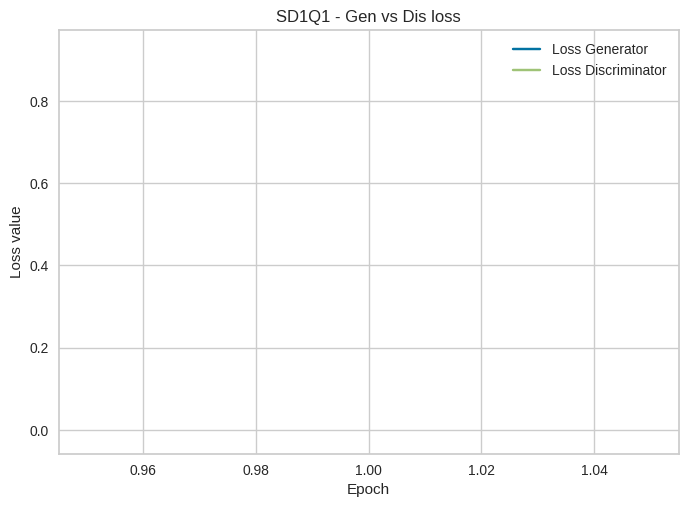

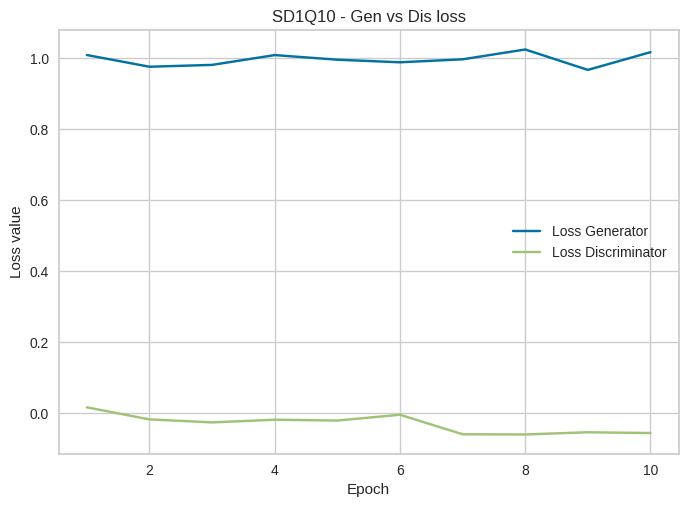

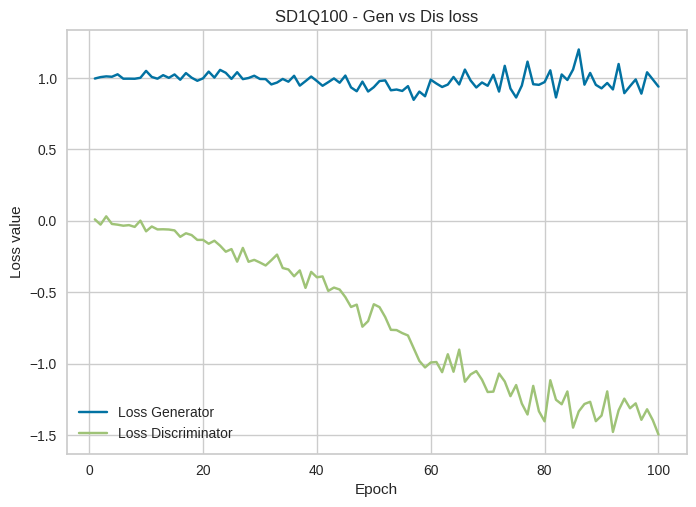

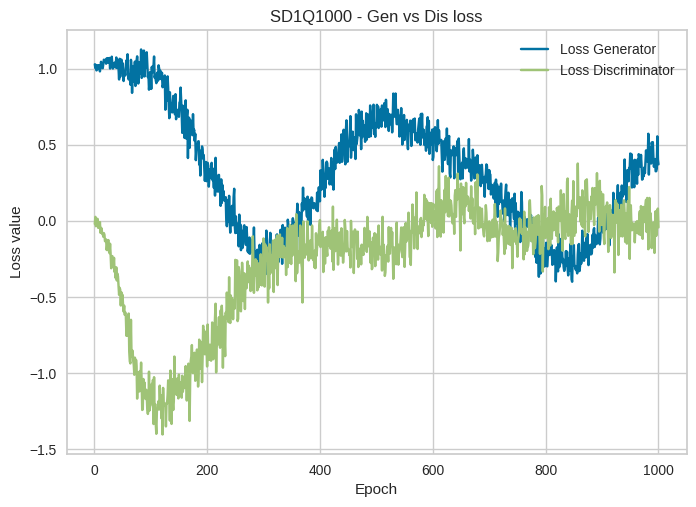

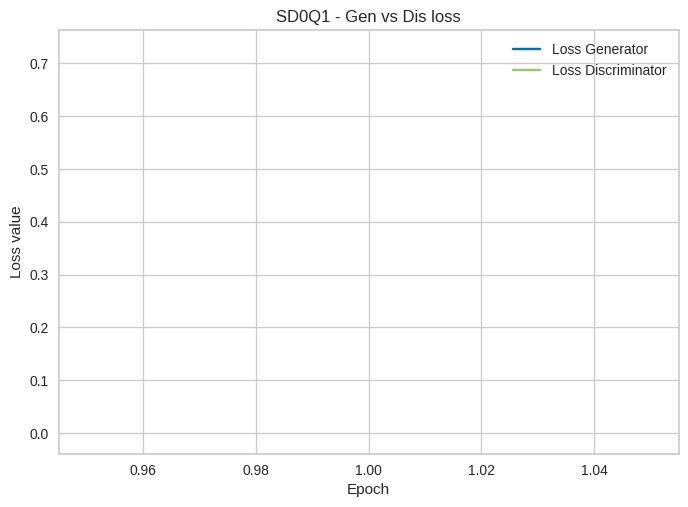

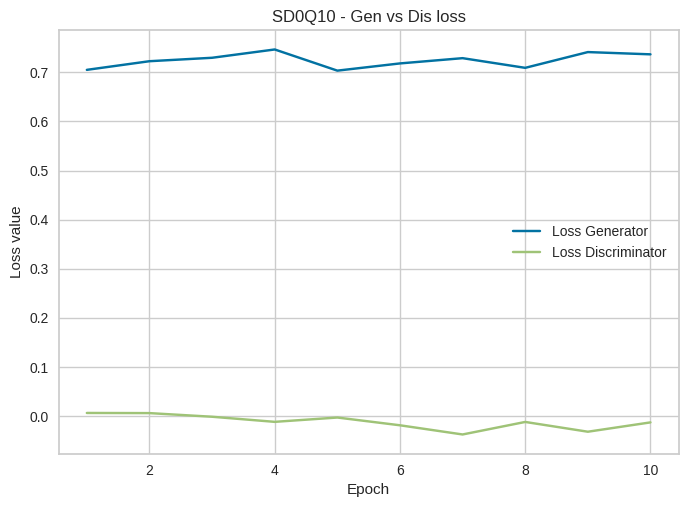

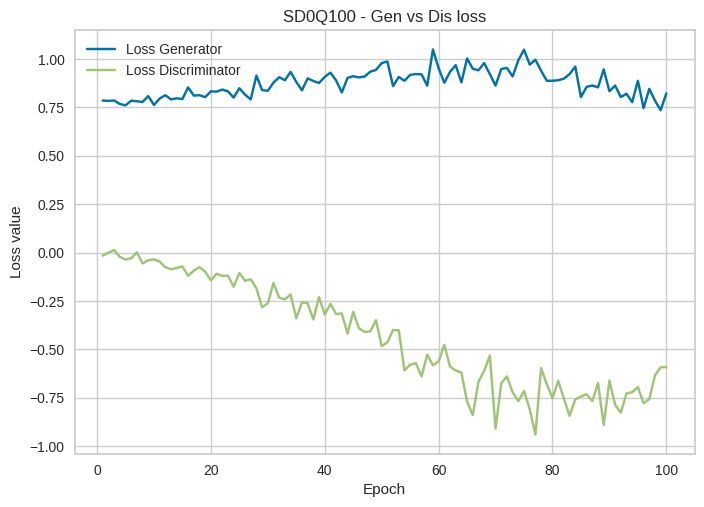

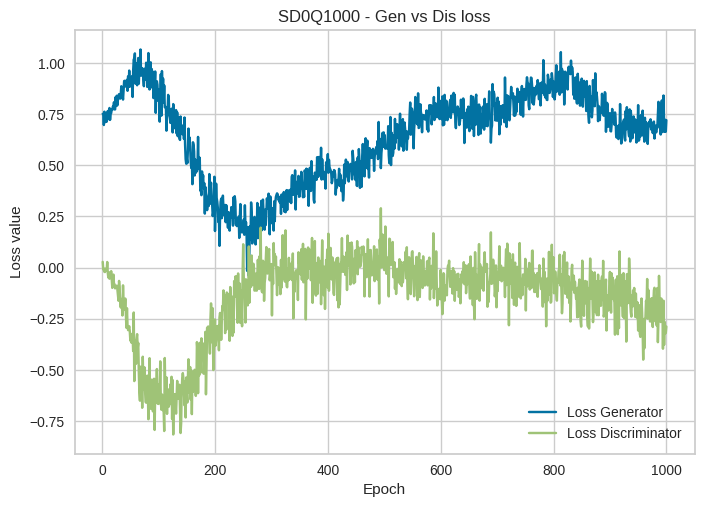

In [7]:
%cd /content/drive/Othercomputers/ThinkPad/master-thesis-vt23/notebooks
%run -t Step3-SDG.ipynb

In [ ]:
%cd /content/drive/Othercomputers/ThinkPad/master-thesis-vt23/notebooks
%run -t Step4-SD-Models-CPU.ipynb

In [ ]:
#%cd /content/drive/Othercomputers/ThinkPad/master-thesis-vt23/notebooks
#%run -t Step5-Measures_PF.ipynb